In [ ]:
# Linear Regression Model
lin_x = np.c_[dataframe[["LSTAT"]]]
lin_y = np.c_[y]
model = LinearRegression()
model.fit(lin_x, lin_y)

# predict y from the data
x_new = np.linspace(lin_x.min(), lin_x.max(), 200)
y_new = model.predict(x_new[:, np.newaxis])


plt.plot(X['LSTAT'], y.values, "b.")
plt.plot(x_new, y_new, "r-")
plt.xlabel("$x_1$ - % Lower Status of The Population", fontsize=18)
plt.ylabel("$y$ - Housing Price", rotation=90, fontsize=18)
plt.show()

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(np.c_[dataframe["LSTAT"]])
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# plot
X_new=np.linspace(0, 40, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X['LSTAT'], y.values, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

In [ ]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(np.c_[dataframe["LSTAT"]])
lin_reg = LinearRegression()s
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# plot
X_new=np.linspace(0, 40, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X['LSTAT'], y.values, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

In [ ]:
<h1><font color="red">Optimal Model</font>: Visualize 2nd-Degree Polynomial Regression for LSTAT (% lower status of the population)and Median Housing Price Data</h1>

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = y

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dataframe[col]
    y = target
    
    # polynomial regression
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly_features.fit_transform(np.c_[x])
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    lin_reg.intercept_, lin_reg.coef_
    X_new = np.linspace(0, x.max(), 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    
    # predict y from the data
    y_new = lin_reg.predict(X_new_poly)
    # plot polynomial curve
    plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")


    # scatter plot of data
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
plt.figure(figsize=(20, 12))

features = ['CRIM', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT']
y = pd.DataFrame(boston.target)

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)    
    X = dataframe[col]
    
    # linear regression model
    lreg = LinearRegression()
    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3)
    X_train = X_train.values.reshape(-1,1) 
    x_test = x_test.values.reshape(-1,1) 
    lreg.fit(X_train, y_train)
    
    # pred, mse, and r_value
    pred = lreg.predict(x_test)
    mse = np.mean((pred - y_test)**2)
    r_value= round(lreg.score(X_train, y_train)*100, 0)
    
    lin_x = np.c_[X_train]
    lin_y = np.c_[y_train]    
    # lin_x = np.c_[x]
    # lin_y = np.c_[y]
    # model = LinearRegression()
    # model.fit(lin_x, lin_y)
    
    # predict y from the data
    x_new = np.linspace(lin_x.min(), lin_x.max(), 200)
    y_new = model.predict(x_new[:, np.newaxis])
    plt.plot(x_new, y_new, "r-")

    # scatter plot of data
    plt.scatter(x, y, marker='o')
    plt.title(f'{col}:\nR_square {r_value}%, MSE:{np.round(mse.values,2)}')
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.tight_layout()

<h1><font color="red">Underfit Linear Regression Model</font></h1>

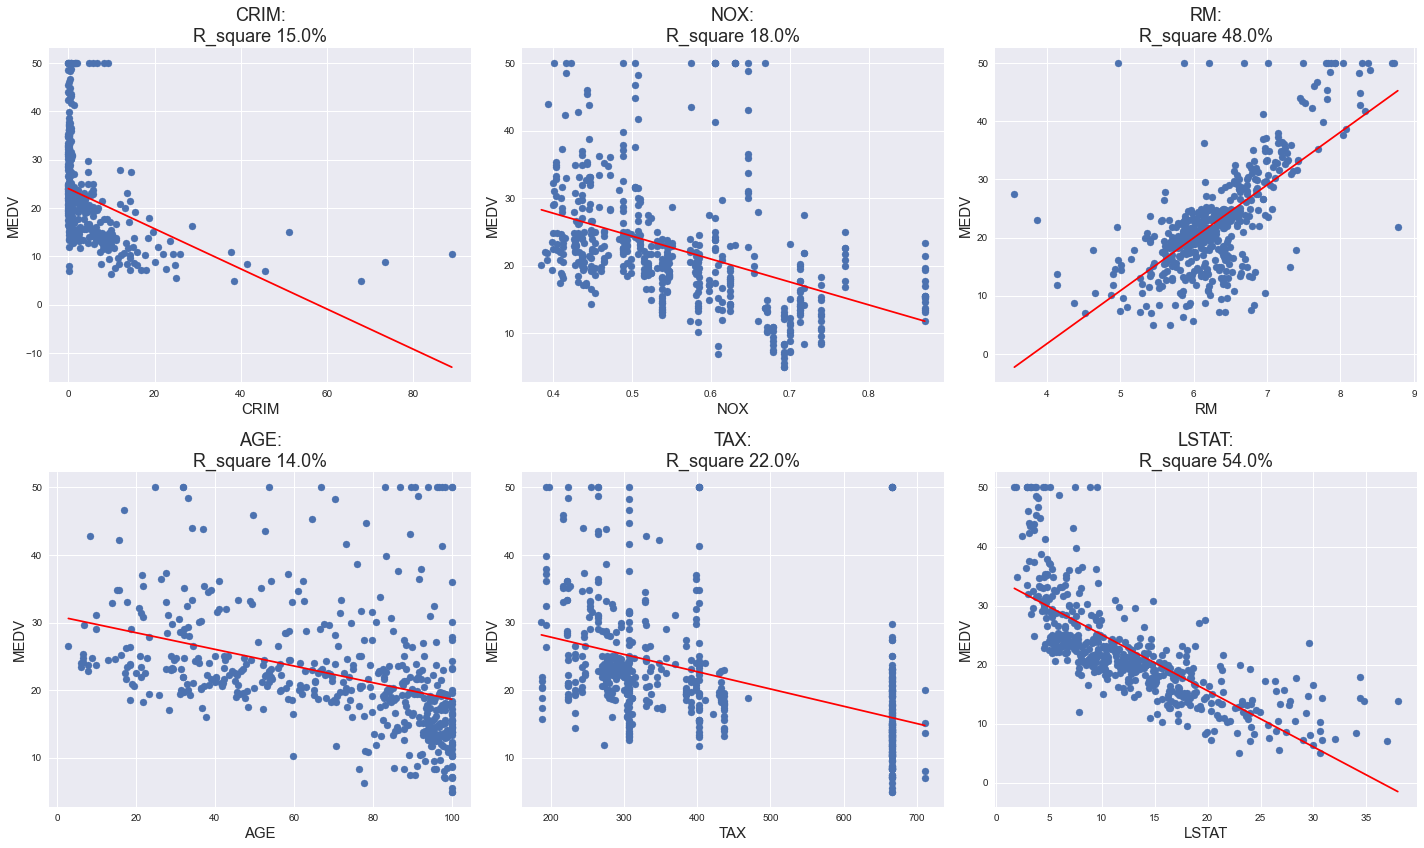

In [14]:
plt.figure(figsize=(20, 12))

features = ['CRIM', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT']
y = pd.DataFrame(boston.target)

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)    
    X = dataframe[col]
    
    # convert data into a 2d array for linear regression
    lin_x = np.c_[X]
    lin_y = np.c_[y]
    # instantiate model
    model = LinearRegression()
    # linear regression with data
    model.fit(lin_x, lin_y)    
    
    # r_value
    r_value= round(model.score(lin_x, lin_y)*100, 0)
   
    # predict y from the data
    x_new = np.linspace(lin_x.min(), lin_x.max(), 200)
    y_new = model.predict(x_new[:, np.newaxis])
    plt.plot(x_new, y_new, "r-")

    # scatter plot of data
    plt.scatter(lin_x, lin_y, marker='o')
    plt.title(f'{col}:\nR_square {r_value}%')
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.tight_layout()

<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h3>Comments</h3></center>
<ul>
    <li>The coefficient of determination for the features in this model are 15-54%</li><br>
    <li>The LSTAT and RM features had the greatest coefficient of determination in this dataset.</li><br>
    <li>Combining features in a single linear regression may improve the model performance.</li><br>    
</ul>
</div>

<h2>Linear Regression Analysis using Six Features</h2>

In [16]:
predictors = ['CRIM', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT']
X = dataframe[predictors]
y = pd.DataFrame(boston.target)
X_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3)
lreg = LinearRegression()
lreg.fit(X_train, y_train)
pred = lreg.predict(x_cv)
mse = np.mean((pred - y_cv)**2)
print(f'The mean square error for linear regression with {len(predictors)} features is:\n{mse.values}')
print(f'The R squre value for this model is {round(lreg.score(x_cv, y_cv)*100, 0)}%')

The mean square error for linear regression with 6 features is:
[29.39777181]
The R squre value for this model is 61.0%


In [17]:
coeff = pd.DataFrame(X.columns)
coeff['Coefficient Estimate'] = pd.Series(lreg.coef_.flatten())
coeff

0  Coefficient Estimate
0   CRIM             -0.094854
1    NOX              5.324522
2     RM              4.995277
3    AGE              0.008369
4    TAX             -0.005290
5  LSTAT             -0.632078

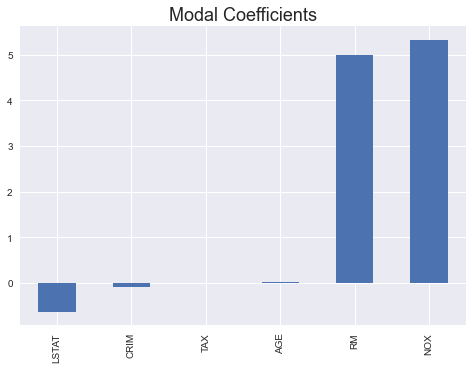

In [18]:
coef = pd.Series(lreg.coef_.flatten(), predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h3>Comments</h3></center>
<ul>
    <li>NOX, RM and LSTAT have the highest coefficent estimates.</li><br>    
    <li>Houses with a greater number of rooms have a higher median household value.</li><br>
    <li>Median household value decreases as the percent of households in poverty increases.</li><br>
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<div style="font-size:14px; border:1px solid black; padding:10px">
    <center><h1>Standard liner regression does not fit the data properly.</h1></center>
<ul>
<li>Linear models are typically considered for data that scatters in a single direction (correlate).</li><br>    
<li>In many cases, data will be more complex than a straight line, calling for a more nuanced approach.</li><br>
<li>Linear models can be used to fit nonlinear data.</li><br>
<li>One method is to add new features that contains the powers of the original features.</li><br>
<li>A linear model can then be trained on this new extended data, and this technique is called <font color="red"><strong><em>Polynomial regression</em></strong></font>.</li><br>    
</ul>
</div>

<h1>Evaluate Data Analysis</h1>

In [ ]:
# Linear Regression Model
lin_x = np.c_[dataframe["LSTAT"]]
lin_y = np.c_[y]
model = LinearRegression()
model.fit(lin_x, lin_y)

# predict y from the data
x_new = np.linspace(lin_x.min(), lin_x.max(), 200)
y_new = model.predict(x_new[:, np.newaxis])


plt.plot(X['LSTAT'], y.values, "b.")
plt.plot(x_new, y_new, "r-")
plt.xlabel("$x_1$ - % Lower Status of The Population", fontsize=18)
plt.ylabel("$y$ - Housing Price", rotation=90, fontsize=18)
plt.show()

<div style="font-size:14px; border:1px solid black; padding:10px">
    <center><h1>Standard liner regression does not fit the data properly.</h1></center>
<ul>
<li>Linear models are typically considered for data that scatters in a single direction (correlate).</li><br>    
<li>In many cases, data will be more complex than a straight line, calling for a more nuanced approach.</li><br>
<li>Linear models can be used to fit nonlinear data.</li><br>
<li>One method is to add new features that contains the powers of the original features.</li><br>
<li>A linear model can then be trained on this new extended data, and this technique is called <font color="red"><strong><em>Polynomial regression</em></strong></font>.</li><br>    
</ul>
</div>

In [ ]:
<h1>Evaluate Data Analysis</h1>

# Linear Regression Model
lin_x = np.c_[dataframe["LSTAT"]]
lin_y = np.c_[y]
model = LinearRegression()
model.fit(lin_x, lin_y)

# predict y from the data
x_new = np.linspace(lin_x.min(), lin_x.max(), 200)
y_new = model.predict(x_new[:, np.newaxis])


plt.plot(X['LSTAT'], y.values, "b.")
plt.plot(x_new, y_new, "r-")
plt.xlabel("$x_1$ - % Lower Status of The Population", fontsize=18)
plt.ylabel("$y$ - Housing Price", rotation=90, fontsize=18)
plt.show()

<div style="font-size:14px; border:1px solid black; padding:10px">
    <center><h1>Standard liner regression does not fit the data properly.</h1></center>
<ul>
<li>Linear models are typically considered for data that scatters in a single direction (correlate).</li><br>    
<li>In many cases, data will be more complex than a straight line, calling for a more nuanced approach.</li><br>
<li>Linear models can be used to fit nonlinear data.</li><br>
<li>One method is to add new features that contains the powers of the original features.</li><br>
<li>A linear model can then be trained on this new extended data, and this technique is called <font color="red"><strong><em>Polynomial regression</em></strong></font>.</li><br>    
</ul>
</div>

<h1> Import Data</h1>

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston">As of 12/25/20 Documentation</a>

<ul>
    <li>Instances: 506</li>
    <li>Attributes: 13</li>
    <li>Creators: Harrison, D. and Rubinfeld, D.L.</li>   
</ul>

<strong>References</strong>

<li>Belsley, Kuh & Welsch, ‘Regression diagnostics: Identifying Influential Data and Sources of Collinearity’, Wiley, 1980. 244-261.</li>

<li>Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.</li>

<h2>Polynomial Regression</h2>

In [ ]:
# Data
predictors = ['CRIM', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT']
X = dataframe[predictors]
y = pd.DataFrame(boston.target)

# polynomial regression
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(np.c_[X])
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
coeff = pd.DataFrame(X.columns)
coeff['Coefficient Estimate'] = pd.Series(lin_reg.coef_.flatten())
coeff

In [ ]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)

In [20]:
x_stat = np.c_[dataframe['LSTAT']]
y = pd.DataFrame(boston.target).values
X_new = np.linspace(0, x_stat.max(), 100).reshape(100, 1) #.reshape converts to 2d array
alphas=(0, 10**-5, 1)
model = Ridge(alphas[1])
model = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),])

In [23]:
model.fit(x_stat, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', Ridge(alpha=1e-05))])

In [24]:
y_new_regul = model.predict(X_new)

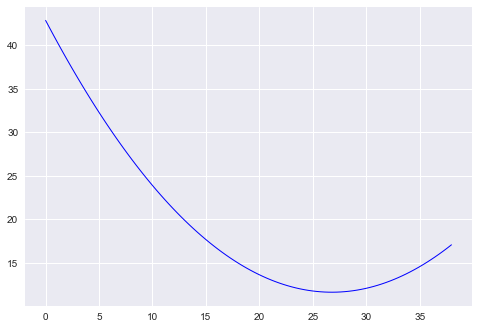

In [28]:
plt.plot(X_new, y_new_regul, "b-", linewidth=1, label=r"$\alpha = {}$".format(alphas[1]))

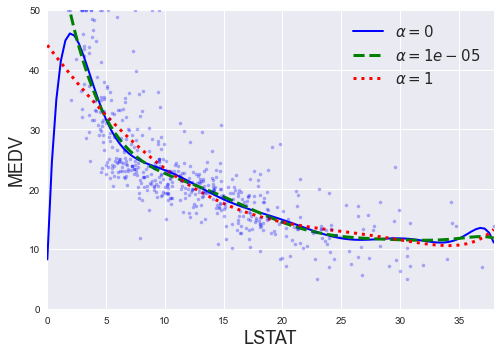

In [57]:
dataframe = dataframe
data = 'LSTAT'
values = pd.DataFrame(boston.target)
alphas = (0, 10**-5, 1)

plot_model(dataframe, data, values, alphas)

<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1>Goals</h1></center>
<ul>
<li>To describe the three most common regularization of linear models:<br>
    <ul>
        <li>Ridge Regression</li>
        <li>Lasso Regression</li>
        <li>Elastic Net Regression</li>
    </ul>            
    </li><br> 
</ul>
</div>

In [ ]:
<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1>Goals</h1></center>
<ul>
<li>To describe the three most common regularization of linear models:<br>
    <ul>
        <li>Ridge Regression</li>
        <li>Lasso Regression</li>
        <li>Elastic Net Regression</li>
    </ul>            
    </li><br> 
</ul>
</div>